# Market Prediction

Elias Eskelinen, Vili Niemelä, Matti Aalto and Jarkko Komulainen

---

In this project, a model to predict the house-prices of the Philadelphia metropolitan areas in U.S. is implemented.

## Data onboarding

Initialize libraries

In [29]:
import os
import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

Fetch the data from the kaggle API (saved as a local file)

In [19]:
# Fetch the latest version of the dataset from kaggle
# Requires authentication
data_dir = kagglehub.competition_download('hull-tactical-market-prediction')
data_path = os.path.join(data_dir, "train.csv")

Load the data from the local file

In [20]:
data = pd.read_csv(data_path)
print(data.shape)
print(data.head())

(9021, 98)
   date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9  ...  V3  V4  V5  V6  V7  V8  \
0        0   0   0   0   1   1   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
1        1   0   0   0   1   1   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
2        2   0   0   0   1   0   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
3        3   0   0   0   1   0   0   0   0   0  ... NaN NaN NaN NaN NaN NaN   
4        4   0   0   0   1   0   0   0   0   0  ... NaN NaN NaN NaN NaN NaN   

   V9  forward_returns  risk_free_rate  market_forward_excess_returns  
0 NaN        -0.002421        0.000301                      -0.003038  
1 NaN        -0.008495        0.000303                      -0.009114  
2 NaN        -0.009624        0.000301                      -0.010243  
3 NaN         0.004662        0.000299                       0.004046  
4 NaN        -0.011686        0.000299                      -0.012301  

[5 rows x 98 columns]


---

## Data visualization and exploratory analysis

The time-series dataset consists of 9021 samples with 98 variables. The variables are

- `date_id`: An identifier for a single trading day.

- `M*`: Market Dynamics/Technical features.

- `E*`: Macro Economic features.

- `I*`: Interest Rate features.

- `P*`: Price/Valuation features.

- `V*`: Volatility features.

- `S*`: Sentiment features.

- `MOM*`: Momentum features.

- `D*`: Dummy/Binary features.

- `forward_returns`: The returns from buying the S&P 500 and selling it a day later. Train set only.

- `risk_free_rate`: The federal funds rate. Train set only.

- `market_forward_excess_returns`: Forward returns relative to expectations. Computed by subtracting the rolling five-year mean forward returns and winsorizing the result using a median absolute deviation (MAD) with a criterion of 4. Train set only.


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9021 entries, 0 to 9020
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        9021 non-null   int64  
 1   D1                             9021 non-null   int64  
 2   D2                             9021 non-null   int64  
 3   D3                             9021 non-null   int64  
 4   D4                             9021 non-null   int64  
 5   D5                             9021 non-null   int64  
 6   D6                             9021 non-null   int64  
 7   D7                             9021 non-null   int64  
 8   D8                             9021 non-null   int64  
 9   D9                             9021 non-null   int64  
 10  E1                             7237 non-null   float64
 11  E10                            8015 non-null   float64
 12  E11                            8015 non-null   f

There is plenty of missing data; most variables have over a thousand `null` values. 

The predicted feature is `forward_returns`. Plotting the predicted variables over time 

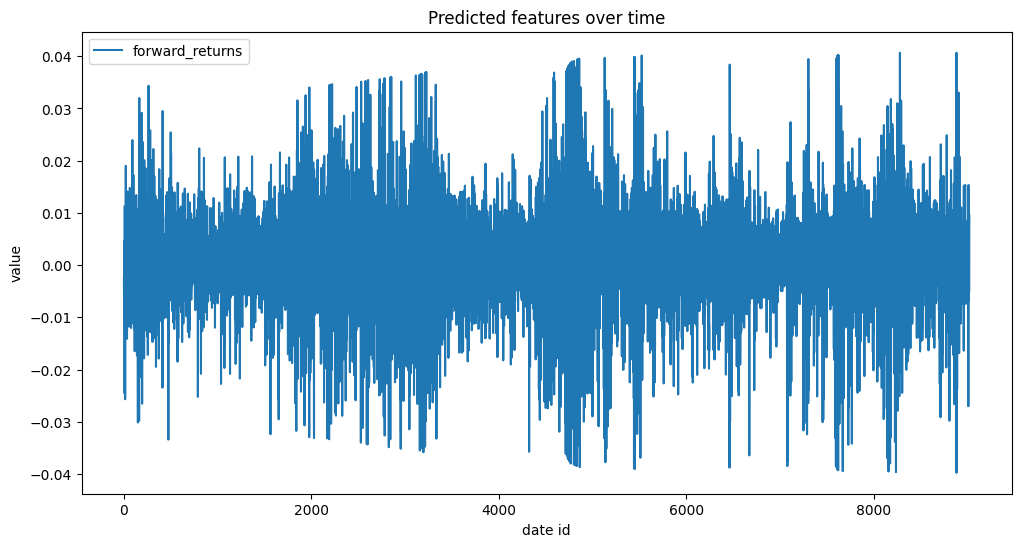

In [26]:
plt.figure(figsize=(12,6))
for f in ['forward_returns']: 
    plt.plot(data['date_id'], data[f], label=f)
plt.title('Predicted features over time')
plt.legend(loc='upper left')
plt.xlabel("date id")
plt.ylabel("value")
plt.show()

The correlation matrix of the data

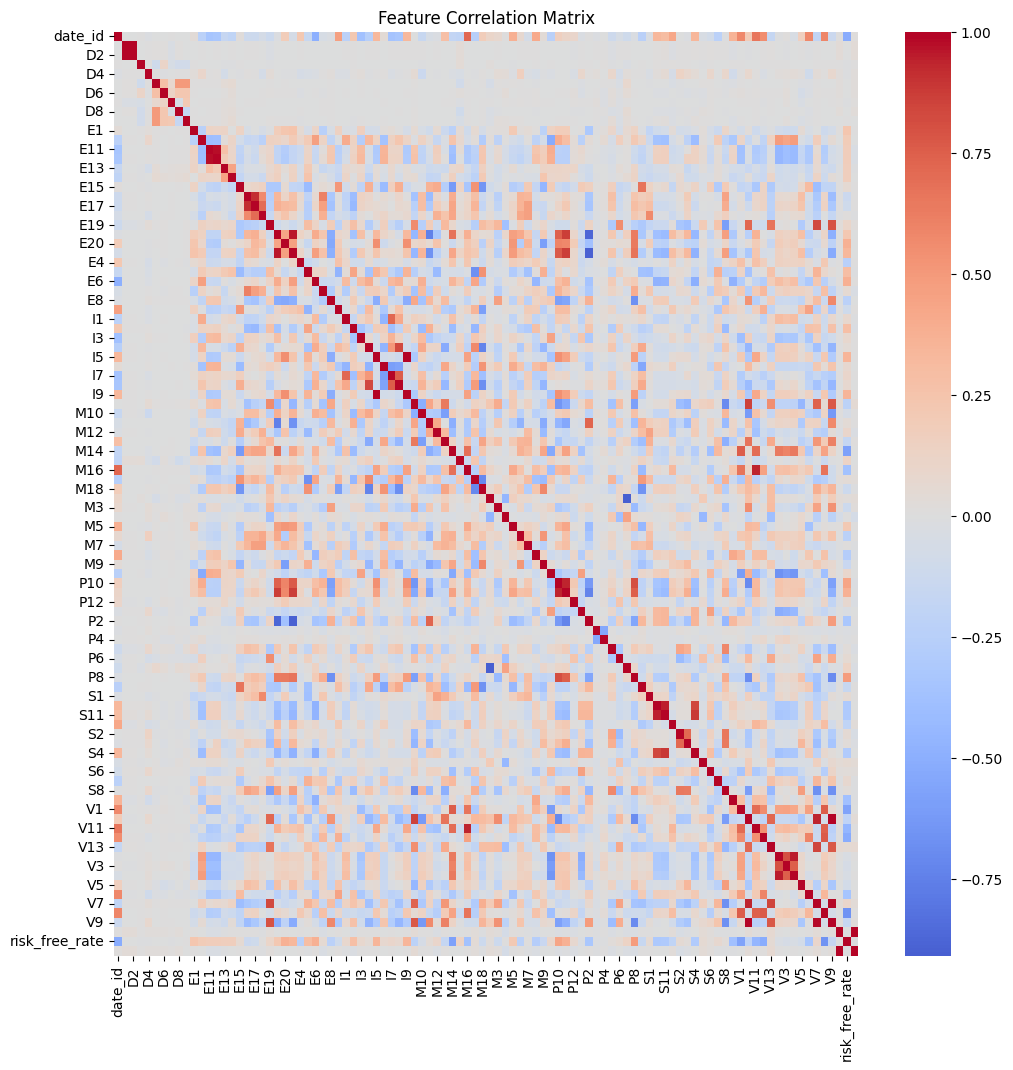

In [33]:
corr = data.corr()

plt.figure(figsize=[12, 12])
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()

---

## Time-series decomposition analysis

For decomposition we use statsmodels Seasonal-Trend decomposition which decomposes time series into trend, seasonal, and residual. The method requires that the season length has to be defined.

Defining the corresponding hypreparameters by visually studying the price time series:

In [23]:
plt.figure(figsize=(25,5))
plt.plot(data["price"])
plt.title("House prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()


KeyError: 'price'

<Figure size 2500x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(data.iloc["price"]) #20:10000,
plt.title("House prices zoomed")
plt.xlabel("Time")
plt.ylabel("Price")

plt.figure(figsize=(25,5))
plt.plot(data["price"][400000:402000])
plt.title("House prices zoomed")
plt.xlabel("Time")
plt.ylabel("Price")

plt.figure(figsize=(25,5))
plt.plot(data["price"][800000:802000])
plt.title("House prices zoomed")
plt.xlabel("Time")
plt.ylabel("Price")

plt.figure(figsize=(25,5))
plt.plot(data["price"][800020:800200])
plt.plot(data.index[800028], data["price"][800028], "*r", label="start of the season: t=800028")
plt.plot(data.index[800170], data["price"][800170], "*g", label="end of the season t=800170")
plt.title("House prices zoomed")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()

plt.show()

---

## Autocorrelation analysis

---

## Partitioning the time-series data